In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
robberies_in_boston = pd.read_csv(r"C:\MainDataAnalysis\3.Projects\machine learning\netology\18.Знакомство с временными рядами\home_work\Series\monthly-boston-armed-robberies-j.csv")

In [3]:
def double_ema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return pd.Series(result)

In [4]:
def plot_dema(alpha, beta):
    dema = double_ema(robberies_in_boston["Count"], alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(robberies_in_boston["Count"], color='blue',label='original')
        plt.plot(dema, color='red', linewidth='1', label='DEMA')
        plt.title("alpha={}, beta={}".format(alpha, beta))
        plt.legend()

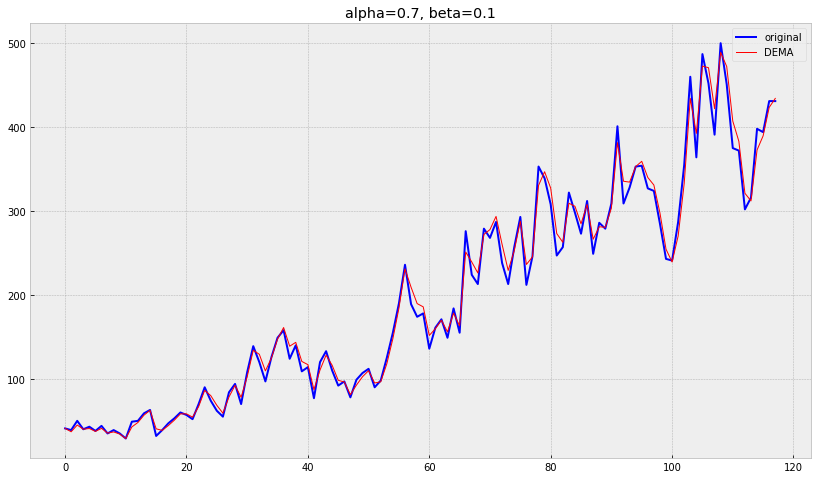

In [5]:
plot_dema(0.7, 0.1)

